<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


Uma das área que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicado o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/2940191.jpg" height="300px">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

### Hipóteses Iniciais

## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
# instalar os pacotes necessários
! pip install -q scikit-plot

In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
from xgboost import XGBClassifier

# definir o estilo do seaborn para os plots
sns.set_style('dark')

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importar os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")
pd.set_option('display.max_columns', None)

## Análise Exploratória de Dados

In [ ]:
# Checar as dimensões do DataFrame 
print(f'O DataFrame possui {df.shape[0]} entradas e {df.shape[1]} colunas')

O DataFrame possui 45000 entradas e 43 colunas


In [ ]:
# Checar o nome das colunas
print(f'\nNome das Colunas:\n{df.columns.values}')


Nome das Colunas:
['ids' 'target_default' 'score_1' 'score_2' 'score_3' 'score_4' 'score_5'
 'score_6' 'risk_rate' 'last_amount_borrowed' 'last_borrowed_in_months'
 'credit_limit' 'reason' 'income' 'facebook_profile' 'state' 'zip'
 'channel' 'job_name' 'real_state' 'ok_since' 'n_bankruptcies'
 'n_defaulted_loans' 'n_accounts' 'n_issues' 'application_time_applied'
 'application_time_in_funnel' 'email'
 'external_data_provider_credit_checks_last_2_year'
 'external_data_provider_credit_checks_last_month'
 'external_data_provider_credit_checks_last_year'
 'external_data_provider_email_seen_before'
 'external_data_provider_first_name' 'external_data_provider_fraud_score'
 'lat_lon' 'marketing_channel' 'profile_phone_number' 'reported_income'
 'shipping_state' 'shipping_zip_code' 'profile_tags' 'user_agent'
 'target_fraud']


In [ ]:
# Checar as 5 primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Desse primeiro contato com os dados podemos concluir que:
* A coluna `ids`, representa de forma anônima, cada um dos clientes do NuBank. Por não conter informações relevantes, irei excluí-la mais a frente.

* Diferente de outros datasets que já trabalhei, esse a variável alvo não aparece na última coluna e sim na segunda, como `target_default`. O objetivo dessa variável é dizer se o respectivo cliente possui risco de inadimplência.

* As colunas `last_amount_borrowed` e `last_borrowed_in_months`, são referentes ao valor do empréstimo e há quantos meses foi o último empréstimo, respectivamente.

* Outra coluna que podemos ver é a `risk_rate`, que representa a taxa de risco que um cliente representa, na avaliação de crédito.

* Existem diversas colunas que apresentam uma codificação, como por exemplo `score-1` ,`score-2`, `reason`, `state`, `zip`, `channel`, `job_name`, `real_state`. Essas são colunas que precisam de uma análise mais minunciosa, a fim de saber se podemos extrair alguma informação.

* Diferente das colunas `score-1` e `score-2`, as colunas  `score-3`, `score-4` e `score-5` não apresentam codificação e são numéricas.

* A coluna `lat_lon` está em formato *string*, onde nos mostra coordenadas, possivelmente a localização de onde foi acessado o app.


In [ ]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Ao ver o resumo das variáveis numéricas, pude obter algumas informações:
*  Existem variáveis com valores ausentes, por exemplo, a variável `score_3`, possui apenas 44438 entradas, enquanto outras variáveis possuem as 45000.
* A variável `external_data_provider_email_seen_before` possui um valor mínimo incomum, sendo -999, essa entrada em específico está puxando a média para baixo, dessa forma pode atrapalhar a leitura dos dados, o que irei fazer é substituir os valores menores que 0, por `np.nan`.
* A coluna `reported_income`, possui valores `np.inf`, que representam um infinito positivo, isso atrapalharia tanto a análise quanto o desempenho do modelo, por isso irei substituir esse valores por `np.nan`.



In [ ]:
# Checar os tipos de dados (por coluna)
print(f'\nTipos de Dados (por coluna):\n{df.dtypes}')


Tipos de Dados (por coluna):
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip       

Outra informação relevante é a quantidade de valores ausentes por variável.

In [ ]:
# Checar a quantidade de valores ausentes
print(f'Porcentagem de dados ausentes:\t\n{df.isnull().sum() / df.shape[0]}')

Porcentagem de dados ausentes:	
ids                                                 0.000000
target_default                                      0.072422
score_1                                             0.012489
score_2                                             0.012489
score_3                                             0.012489
score_4                                             0.000000
score_5                                             0.000000
score_6                                             0.000000
risk_rate                                           0.012489
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
credit_limit                                        0.306667
reason                                              0.012578
income                                              0.012489
facebook_profile                                    0.099067
state                                               0

A respeito da porcentagem de valores ausentes identificados, foi possível notar:

* Diversas variáveis possuem valores ausentes, mesmo que sejam poucos, alguns até mesmo referentes a variáveis categóricas. Porém, existem variáveis numéricas que também apresentam valores ausentes.
* As variáveis `last_amount_borrowed`, `last_borrowed_in_months`, `ok_since`, `external_data_provider_credit_checks_last_2_year` e `target_fraud` possuem mais da metade dos valores ausentes.
* As variáveis `credit_limit`, `n_issues` e `external_data_provider_credit_checks_last_year  ` possuem entre 25% e 34% dos valores ausentes.
* As outras variáveis, com a exceção da variável `target_fraud`, possuem menos de 10% dos valores ausentes.

O caso com mais valores ausentes é referente a variável `target_fraud`, porém não é um problema, pois essa variável alvo irrelevante para a análise do risco de crédito. Porém, todas as outra variáveis representam informações relevantes para a análise e treino do Modelo De Machine Learning.

A contagem de valores únicos por *feature* é outra análise relevante de se fazer. As variáveis numéricas, podem esconder classes/categorias que podem representar *features* ou revelar que existe uma quantidade elevada de classes por "Variáveis Categóricas".

In [ ]:
# Checar os valores únicos por coluna
print(f'\nValores únicos (por coluna)\n{df.nunique().sort_values()}')


Valores únicos (por coluna)
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                   

Variáveis que possuem apenas um único valor, não nos dão muitas informações e por isso podem ser descartadas para o modelo de machine learning. Variáveis como `ids` e `profile_phone_number`, possuem 45 mil valores únicos e não nos fornecem informação alguma, devem ser descartadas para não atrapalhar a análise, uma vez que é improvável saber se o usuário será inadimplente por conta do número de telefone.

In [4]:
# criar cópia do DataFrame
df_clean = df.copy()

# Substituir inf por nan na variável reported_income
df_clean['reported_income'].replace(np.inf, np.nan, inplace=True)

# descartar colunas desnecessárias/ sem informção aparente ou que demandam mais pesquisa
df_clean.drop(labels=['ids', 'profile_phone_number', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year', 
                      'channel', 'reason', 'zip', 'job_name', 'profile_tags',
                      'application_time_applied', 'email', 
                      'external_data_provider_first_name', 'user_agent'], axis=1, inplace=True)
# descartar entradas NanN para 'target_default'
df_clean.dropna(subset=['target_default'], inplace=True)

#  substituir -999 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan



## Preparação dos Dados

Com as informações que obtivemos da etapa anterior, vamos prosseguir com a limpeza e preparação dos dados.

Apesar de não termos informações aprofundadas a respeito das variáveis, podemos assumir que boa parte dos valores nulos, ocorre por:


> 1. Alguns itens não são de preenchimento obrigatório, como por exemplo o perfil dp facebook



> 2. Existem colunas que não possuem nenhuma observação, como por exemplo ['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues'].


De forma geral, as variáveis que se enquadram no segundo caso, terão os valores nulos substituidos por zero. Para as variáveis numéricas, será adotado o valor da medianda e para as categóricas, o valor mais frequente.




In [5]:
from numpy.lib.function_base import median
from sklearn.impute import SimpleImputer

num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# Substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# variáveis numéricas
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imp_median.transform(df_clean.loc[:,num_df])

# variáveis categóricas
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_frequent = imp_frequent.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imp_frequent.transform(df_clean.loc[:,cat_df])

É possível notar, que agora nenhuma variável possui valores nulos

In [ ]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

Ao verificar o balanceamento da variável alvo, pude notar que a quantidade de inadimplentes é considerávelmente menor do que de não-inadimplentes, ainda bem né. Porém, a diferença não é grande o suficiente para ser necessário um balanceamento.

False    35080
True      6661
Name: target_default, dtype: int64

Proporção entre Inadimplentes
False    0.779556
True     0.148022
Name: target_default, dtype: float64


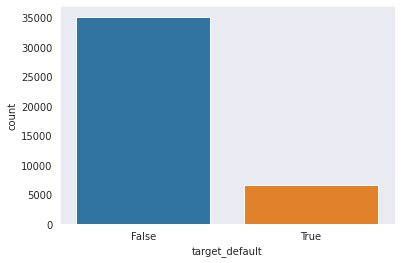

In [ ]:
# Verificar o balanceamento da variável alvo (Inadimplentes)
print(df.target_default.value_counts())
print('\nProporção entre Inadimplentes')
print(df['target_default'].value_counts() / df.shape[0])

sns.countplot(df.target_default)
plt.show();

Na preparação dos dados, também irei realizar o LabelEncoding para possibilitar que as variáveis categóricas sejam codificadas em labels, podendo assim alimentar os modelos de Machine learning


In [6]:
cat_cols = df_clean.select_dtypes('object').columns

for col in cat_cols:
  df_clean[col+'_encoded'] = LabelEncoder().fit_transform(df_clean[col])
  df_clean.drop(col, axis=1, inplace=True)

In [7]:
X = df_clean.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Após realizar a separação do DF em treino e teste e identificar a variável alvo, será feita a padronização e a avaliação dos modelos por meio do Cross-validation.

In [8]:
def val_model(X, y, clf, quite=False):
  X = np.array(X)
  y = np.array(y)

  pipelineSTD_SCA = make_pipeline(StandardScaler(), clf)
  pipelineROB_SCA = make_pipeline(RobustScaler(),   clf)
  
  scoresSTD_SCA = cross_val_score(pipelineSTD_SCA, X, y, scoring='recall')
  scoresROB_SCA = cross_val_score(pipelineROB_SCA, X, y, scoring='recall')
  
  if quite == False:
    print("Recall StandardScaler               : {:.4f} (+/- {:.4f})".format(scoresSTD_SCA.mean(), scoresSTD_SCA.std() * 2))
    print("Recall RobustScaler                 : {:.4f} (+/- {:.4f})".format(scoresROB_SCA.mean(), scoresROB_SCA.std() * 2))

  return scoresSTD_SCA.mean()

In [9]:
ran_for = RandomForestClassifier()
log_reg = LogisticRegression()
XGB_BOO = XGBClassifier()

In [10]:
# printar o desempenho dos modelos com os dados padronizados
print('Cross-validation ran_for:')
score_testeRf     = val_model(X_train, y_train, ran_for)
print('\nCross-validation log_reg:')
score_testeLR     = val_model(X_train, y_train, log_reg)
print('\nCross-validation XGB_BOO:')
score_testeXGB    = val_model(X_train, y_train, XGB_BOO)


Cross-validation ran_for:
Recall StandardScaler               : 0.0367 (+/- 0.0122)
Recall RobustScaler                 : 0.0345 (+/- 0.0077)

Cross-validation log_reg:
Recall StandardScaler               : 0.0097 (+/- 0.0054)
Recall RobustScaler                 : 0.4939 (+/- 0.0396)

Cross-validation XGB_BOO:
Recall StandardScaler               : 0.0878 (+/- 0.0072)
Recall RobustScaler                 : 0.0882 (+/- 0.0071)


In [11]:
# importar metodos para realização do Feature Scaling
scaler = StandardScaler()
Rob_scaler = RobustScaler()

# Padronizando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)
X_train_Rscaled = Rob_scaler.fit_transform(X_train)


Após importar os modelos, realizar a validação e a padronização. Irei realizar o ajuste fino dos parâmetros do modelo, por meio do `GridSearchCV`, de forma que possamos obter um melhor desempenho dos modelos.


É notável que os resultados estão bem longe do satisfatório, porém no teste veremos que os resultados são melhores.

In [15]:
# Modelo a ser otimizado
ran_for_scaled = RandomForestClassifier()

# Parâmetros a serem otimizados
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, None],
 'max_features': ['auto', 'sqrt'],
 
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ran_for_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.059026369168357 para {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt'}


Mesmo com o tuning, os resultados podem inclusive piorar, porém apenas momentâneamente, pois na parte final de tuning é possível ver um aumento da performance


In [17]:
# Modelo a ser otimizado
ran_for_scaled = RandomForestClassifier(bootstrap=False, max_depth=20, max_features="sqrt")

# Parâmetros a serem otimizados
param_grid = {
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ran_for_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.058215010141987836 para {'min_samples_leaf': 1, 'min_samples_split': 2}


Como dito anteriormente, os resultados apresentados não são os resultados reais, mesmo com o aumento do recall, não podemos levar isso como uma verdade, de forma que o modelo final, usará os dados de teste para realizar as previsões que consequentemente representam uma parte maior do nosso DataFrame

In [18]:
# Modelo a ser otimizado
ran_for_scaled = RandomForestClassifier(bootstrap=False, max_depth=20, max_features="sqrt", min_samples_leaf=1, min_samples_split=2)

# Parâmetros a serem otimizados
param_grid = {
 'n_estimators': [50, 100, 150, 200]
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(ran_for_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.0640973630831643 para {'n_estimators': 50}


Com o tuning dos parâmetros finalizados, os dados de teste padronizados, hora de testar o modelo e ver como será as previsões do nosso modelo.

É notório o aumendo de 5% para 52%, porém não creio que seja um modelo satisfatório, a quantidade de falsos negativos chega a ser assustadora.

Creio que não seria um modelo para ser utilizado com dados reais, ao menos não com esses ajustes e resultados. Por estar trabalhando apenas com a versão gratuita do colab, existem limitações e por isso não foi feito um trabalho mais aprofundado na parte de construção do modelo.

              precision    recall  f1-score   support

       False     0.8411    0.9902    0.9096      8705
        True     0.5455    0.0589    0.1064      1731

    accuracy                         0.8358     10436
   macro avg     0.6933    0.5246    0.5080     10436
weighted avg     0.7920    0.8358    0.7763     10436

AUC: 0.5246


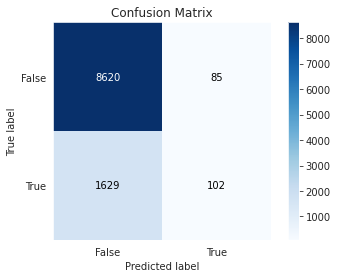

In [19]:
# modelo otimizado
ran_for_scaled = RandomForestClassifier(n_estimators=50, 
                                            bootstrap=False,
                                            max_depth=20, 
                                            max_features="sqrt", 
                                            min_samples_leaf=1, 
                                            min_samples_split=2)

# Treino do Modelo
ran_for_scaled.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_ran_for = ran_for_scaled.predict(X_test_scaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_ran_for)

print(classification_report(y_test, y_pred_ran_for, digits=4))

print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred_ran_for)))


In [20]:
XGB_BOO_scaled = XGBClassifier(learning_rate=0.01)

param_grid = {
    'n_estimators':range(0,200,50),
    'max_depth':[1, 3, 5],
    'min_child_weight':[1, 3, 6],
    'gamma':[0, 1, 5],
}

# Identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(XGB_BOO_scaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Ver resultados
print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.07464503042596349 para {'gamma': 5, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 50}


              precision    recall  f1-score   support

       False     0.8452    0.9876    0.9108      8705
        True     0.5909    0.0901    0.1564      1731

    accuracy                         0.8387     10436
   macro avg     0.7180    0.5389    0.5336     10436
weighted avg     0.8030    0.8387    0.7857     10436

AUC: 0.5389


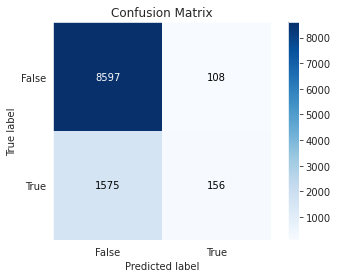

In [21]:
XGB_BOO_scaled = XGBClassifier(learning_rate=0.01, n_estimators=5, gamma=5, max_depth=5, min_child_weight=6)

# Treino do Modelo
XGB_BOO_scaled.fit(X_train_scaled, y_train)

y_pred_XGB_BOO = XGB_BOO_scaled.predict(X_test_scaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_XGB_BOO)

print(classification_report(y_test, y_pred_XGB_BOO, digits=4))

print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred_XGB_BOO)))